In [1]:
import pandas as pd
import scanpy as sc
import json
from IPython.display import Image
from utils import sankey_plot_with_labels

DATA_PATH = 'data/GSE239626/MTX'
LABELS_PATH = 'results/cluster_labels.csv'
RESULTS_FOLDER = 'results/'
GENES_PATH = 'results/celltypist_markers_Immune_All_High.json'
MARKERS1_IMG_PATH = 'materials/photo1714122561.jpeg'
MARKERS2_IMG_PATH = 'materials/photo1714122561.jpeg'
MARKERS2_CORRECTED_PATH = 'materials/IMG_20240426.png'

c:\Users\giuli\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
labels_df = pd.read_csv(LABELS_PATH, index_col=0)
labels_df

,leiden
AAACCCAAGACTGTTC-1,6
AAACCCAAGGATCATA-1,3
AAACCCAGTTATTCTC-1,8
AAACCCATCATGAGGG-1,3
AAACGAAAGCCAGTAG-1,2
...,...
TTTGTTGAGCGTCGAA-20,3
TTTGTTGAGTGTACCT-20,6
TTTGTTGCAATTGCAC-20,12
TTTGTTGCATTCAGCA-20,0


In [3]:
print('Number of clusters:', labels_df['leiden'].nunique())

Number of clusters: 16


In [4]:
adata = sc.read_10x_mtx(
    DATA_PATH,
    var_names='gene_symbols',
    gex_only=False,
    cache=True)

adata.var_names_make_unique()
adata.obs['cluster'] = labels_df['leiden'].values
adata

AnnData object with n_obs × n_vars = 72317 × 36636
    obs: 'cluster'
    var: 'gene_ids', 'feature_types'

In [5]:
adata.obs['cluster'] = adata.obs['cluster'].astype('category')
adata.obs['cluster']

AAACCCAAGACTGTTC-1      6
AAACCCAAGGATCATA-1      3
AAACCCAGTTATTCTC-1      8
AAACCCATCATGAGGG-1      3
AAACGAAAGCCAGTAG-1      2
                       ..
TTTGTTGAGCGTCGAA-20     3
TTTGTTGAGTGTACCT-20     6
TTTGTTGCAATTGCAC-20    12
TTTGTTGCATTCAGCA-20     0
TTTGTTGGTGGGTTGA-20     6
Name: cluster, Length: 72317, dtype: category
Categories (16, int64): [0, 1, 2, 3, ..., 12, 13, 14, 15]

In [6]:
markers_genes_dict_0 = json.load(open(GENES_PATH))
markers_genes_dict_0.keys()

dict_keys(['T cells', 'B cells', 'ILC', 'Monocytes', 'Macrophages', 'Plasma cells', 'HSC/MPP', 'Megakaryocytes/platelets', 'DC', 'pDC', 'Megakaryocyte precursor', 'ETP', 'Cycling cells', 'Double-positive thymocytes', 'Mast cells'])

### Labels from CellTypes Clustering on Genes

In [7]:
def visualize_markes_heatmap(adata, genes_dict):
    for key, markers in genes_dict.items():
        print('Genes selected from celltypist for', key)
        sc.pl.heatmap(adata, markers, groupby='cluster', num_categories=16, swap_axes=True,
            cmap='RdYlBu', figsize=(18, 3), standard_scale='var')

Genes selected from celltypist for T cells


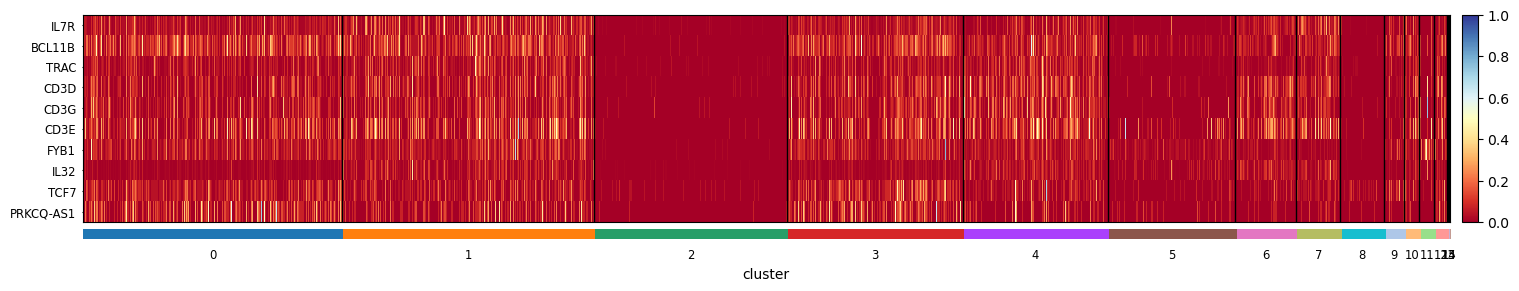

Genes selected from celltypist for B cells


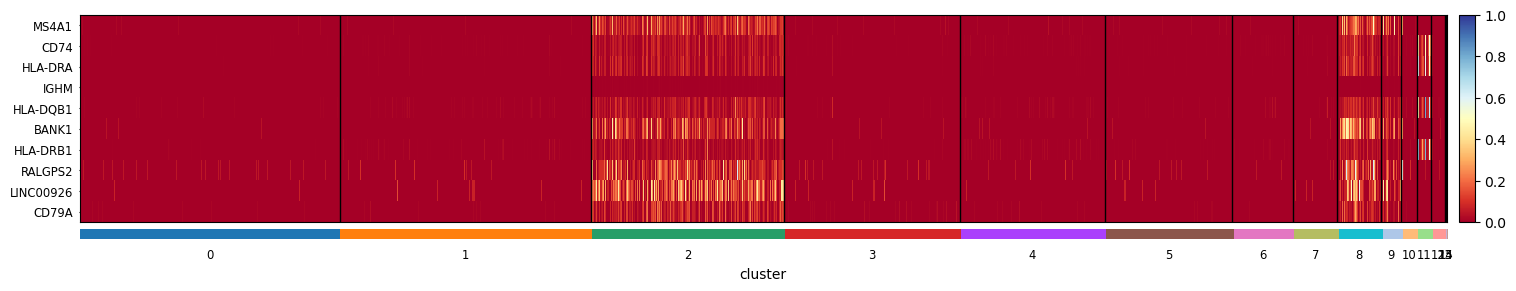

Genes selected from celltypist for ILC


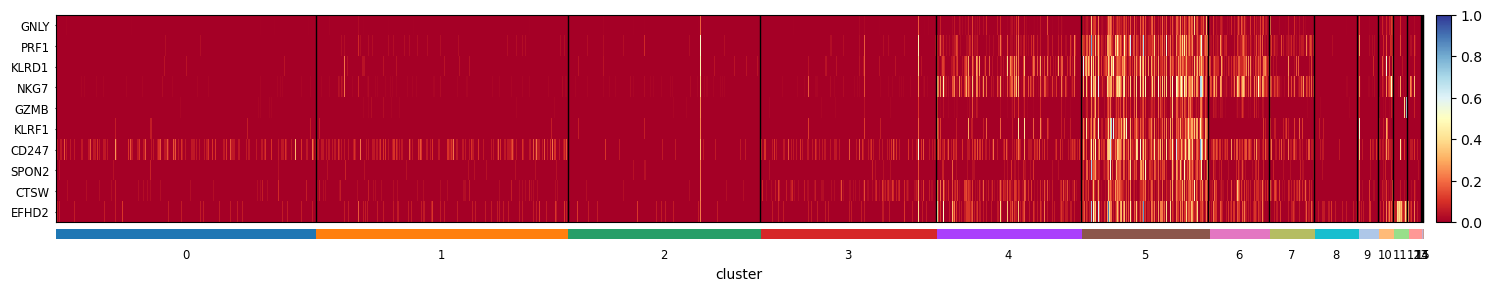

Genes selected from celltypist for Monocytes


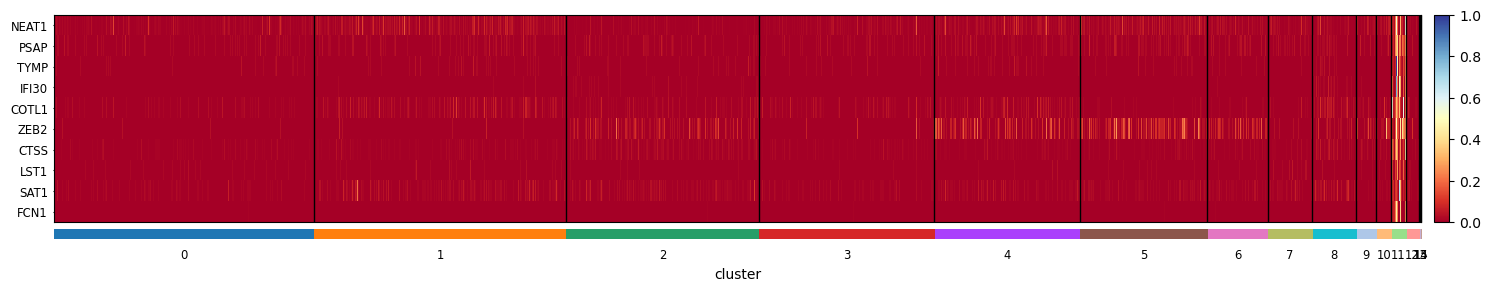

Genes selected from celltypist for Macrophages


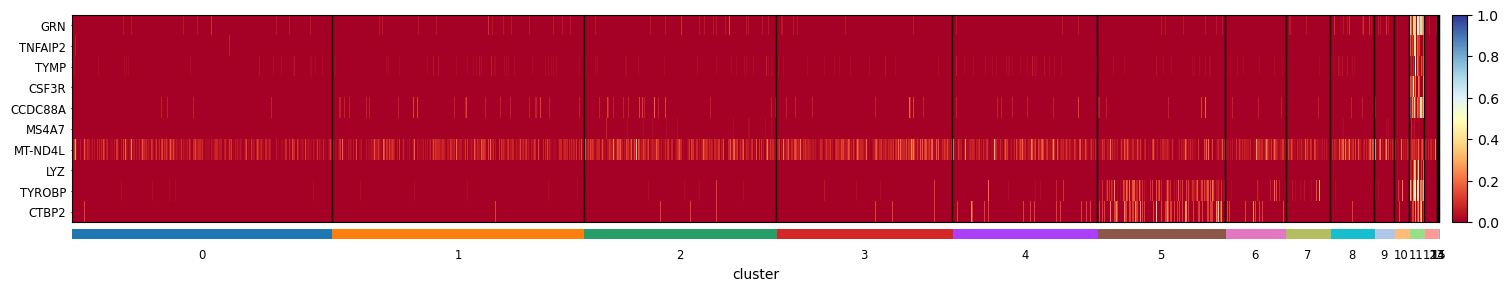

Genes selected from celltypist for Plasma cells


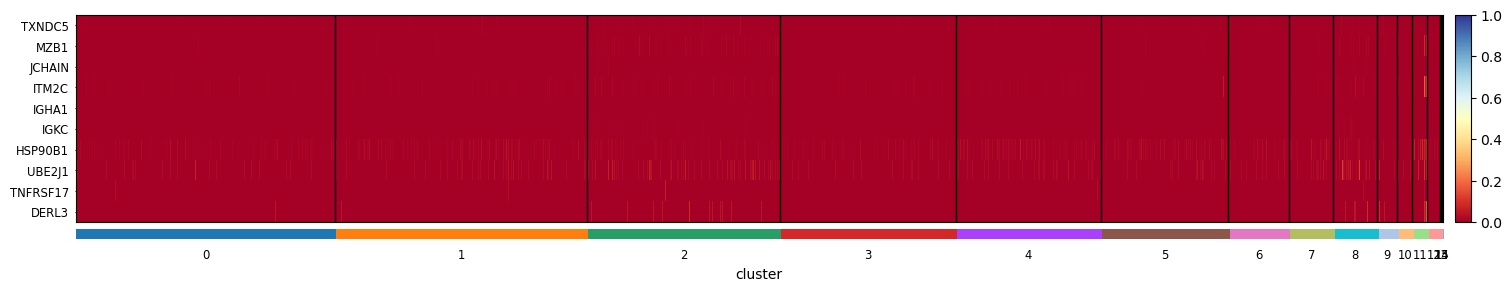

Genes selected from celltypist for HSC/MPP


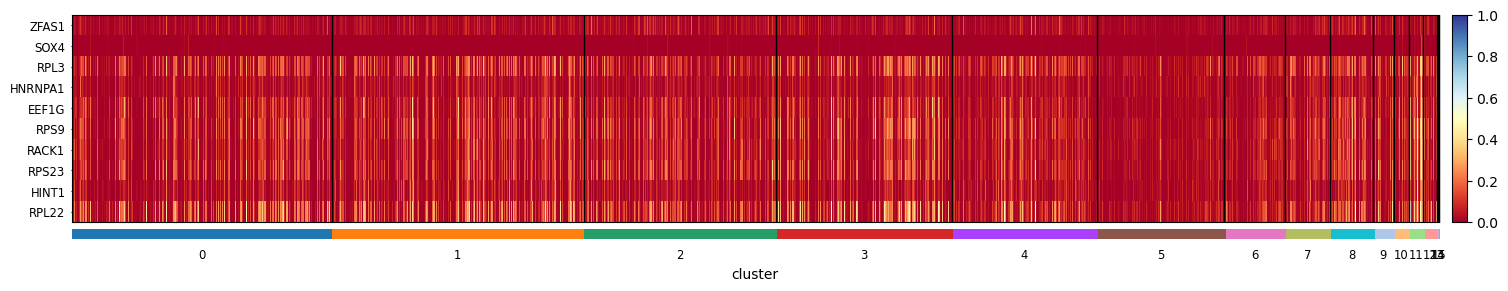

Genes selected from celltypist for Megakaryocytes/platelets


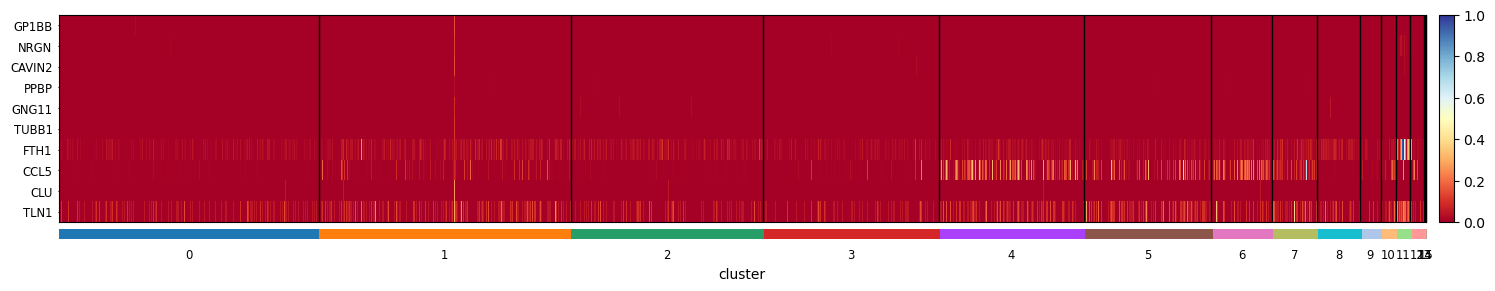

Genes selected from celltypist for DC


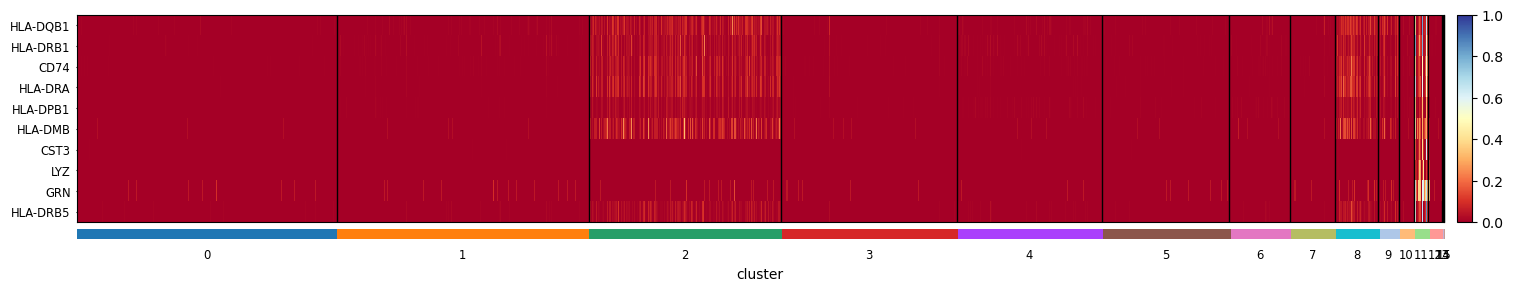

Genes selected from celltypist for pDC


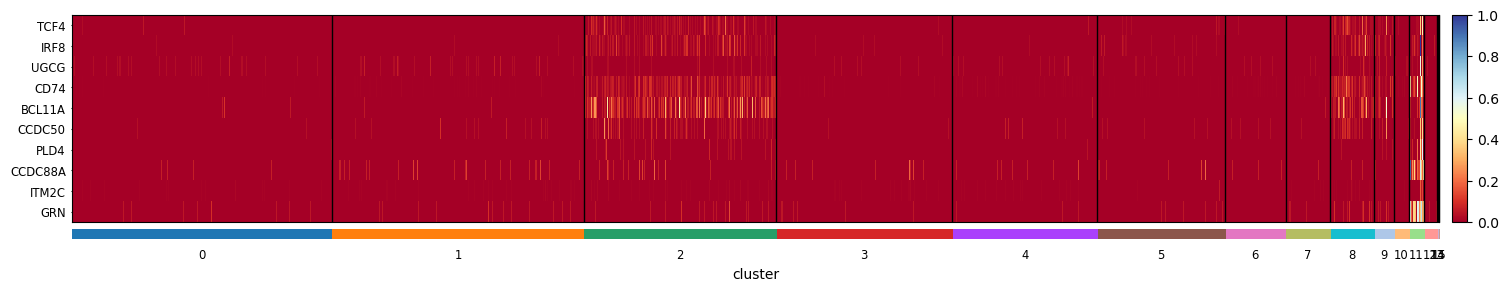

Genes selected from celltypist for Megakaryocyte precursor


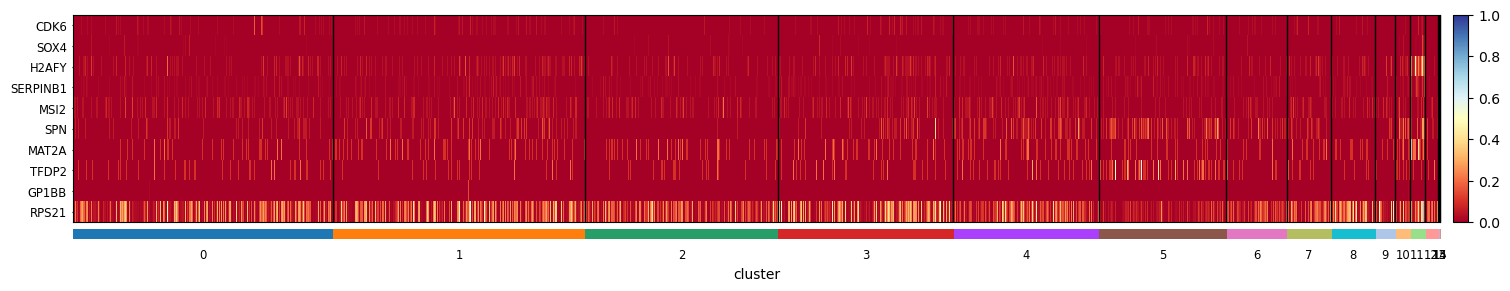

Genes selected from celltypist for ETP


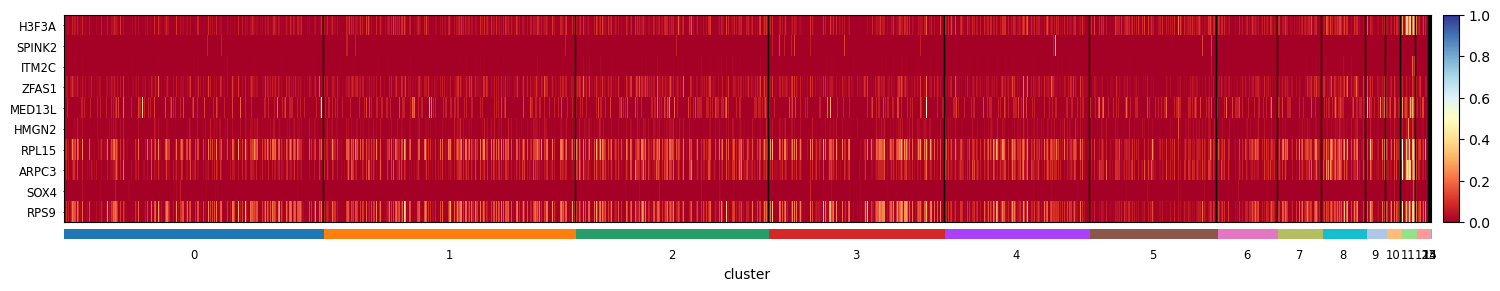

Genes selected from celltypist for Cycling cells


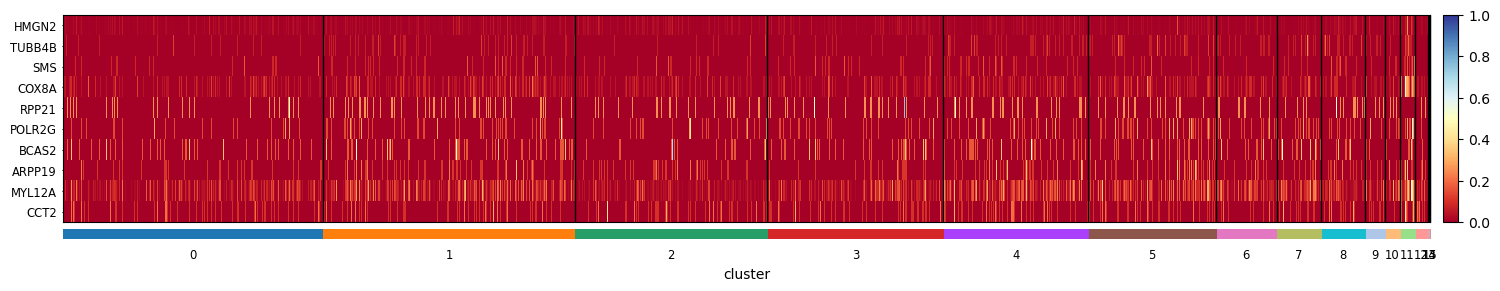

Genes selected from celltypist for Double-positive thymocytes


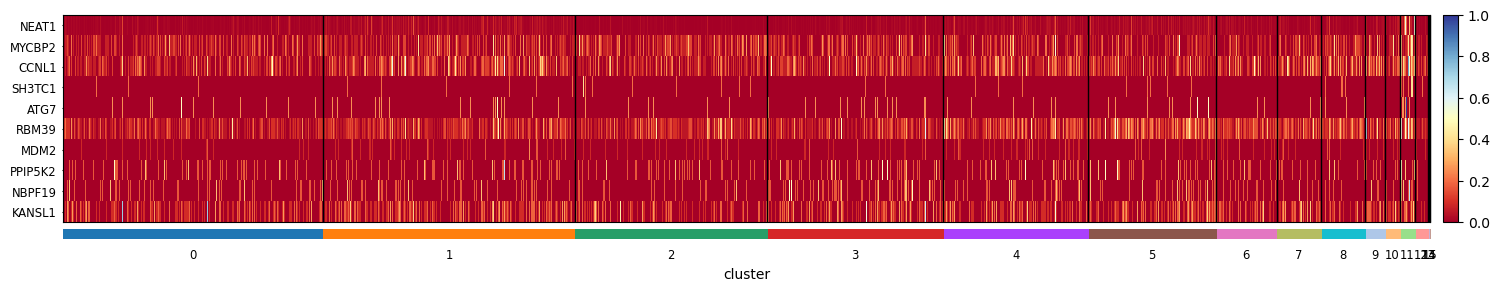

Genes selected from celltypist for Mast cells


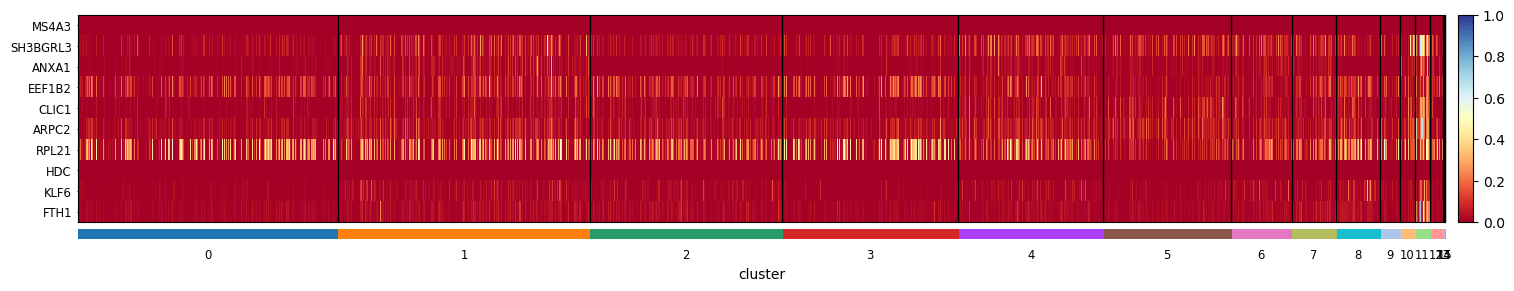

In [8]:
visualize_markes_heatmap(adata, markers_genes_dict_0)

| CELL TYPE                 | 0  | 1  | 2  | 3  | 4  | 5  | 6  | 7  | 8  | 9  | 10 | 11 | 12 | 13 | 14 | 15 |
|---------------------------|----|----|----|----|----|----|----|----|----|----|----|----|----|----|----|----|
| 'T cells'                 | ✔️ | ✔️ |    | ✔️ | ✔️ |    |    |    |    |    |    |    |    |    |    |    |
| 'B cells'                 |    |    | ✔️ |    |    |    |    |    | ✔️ | ✔️ |    |    |    |    |    |    |
| 'ILC'                     |    |    |    |    |    | ✔️ |    |    |    |    |    |    |    |    |    |    |
| 'Monocytes'               |    |    |    |    |    |    |    |    |    |    |    | ✔️ |    |    |    |    |
| 'Macrophages'             |    |    |    |    |    |    |    |    |    |    |    | ✔️ |    |    |    |    |
| 'Plasma cells'            |    |    |    |    |    |    |    |    |    |    |    |    |    |    |    |    |
| 'HSC/MPP'                 | ✔️ | ✔️ |    |    |    |    |    |    |    |    |    |    | ✔️ | ✔️ |    |    |
| 'Megakaryocytes/platelets'|    |    |    |    |    |    |    |    |    |    |    |    |    |    |    |    |
| 'DC'                      |    |    |    |    |    |    |    |    |    |    |    | ✔️ |    |    |    |    |
| 'pDC'                     |    |    |    |    |    |    |    |    |    |    |    | ✔️ |    |    |    |    |
| 'Megakaryocyte precursor' |    |    |    |    |    |    |    |    |    |    |    |    |    |    |    |    |
| 'ETP'                     |    |    |    |    |    |    |    |    |    |    |    |    |    |    |    |    |
| 'Cycling cells'           |    |    |    |    |    |    |    |    |    |    |    |    |    |    |    |    |
| 'Double-positive thymocytes' |    |    |    |    |    |    |    |    |    |    |    | ✔️ |    |    |    |    |
| 'Mast cells'              |    |    |    |    |    |    |    |    |    |    |    | ✔️ |    |    |    |    |


### Labels from literature

#### First set

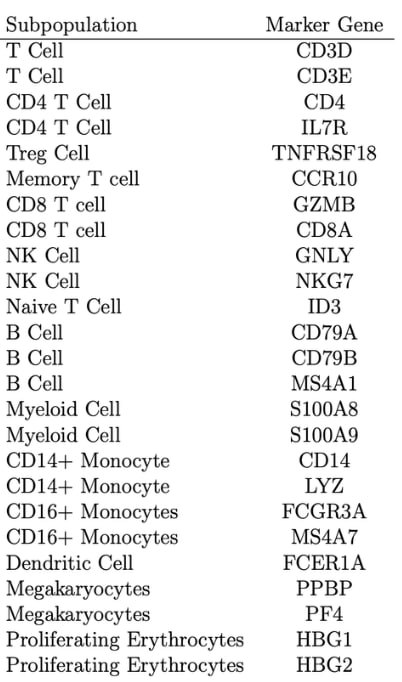

In [9]:
Image(filename=MARKERS1_IMG_PATH, height=250, width=250)

In [10]:
markers_genes_dict_1 = {
    'T Cell': ['CD3D', 'CD3E'],
    'CD4 T Cell': ['CD4', 'IL7R'],
    'Treg Cell': ['TNFRSF18'],
    'CD8 T Cell': ['CD8A', 'GZMB'],
    'NK Cell': ['NKG7', 'GNLY'],
    'Naive T Cell': ['ID3'],
    'B Cell': ['CD79A', 'CD79B', 'MS4A1'],
    'Myeloid Cell': ['S100A8', 'S100A9'],
    'CD14+ Monocyte': ['CD14', 'LYZ'],
    'CD16+ Monocyte': ['FCGR3A', 'MS4A7'],
    'Dendritic Cell': ['FCER1A'],
    'Megakaryocites': ['PPBP', 'PF4'],
    'Proliferating Erythrocytes': ['HBG1', 'HBG2'],
}

Genes selected from celltypist for T Cell


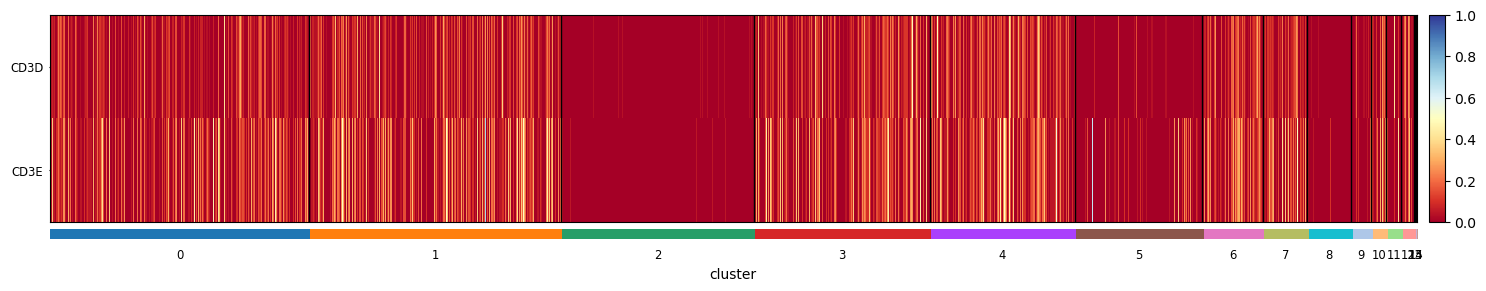

Genes selected from celltypist for CD4 T Cell


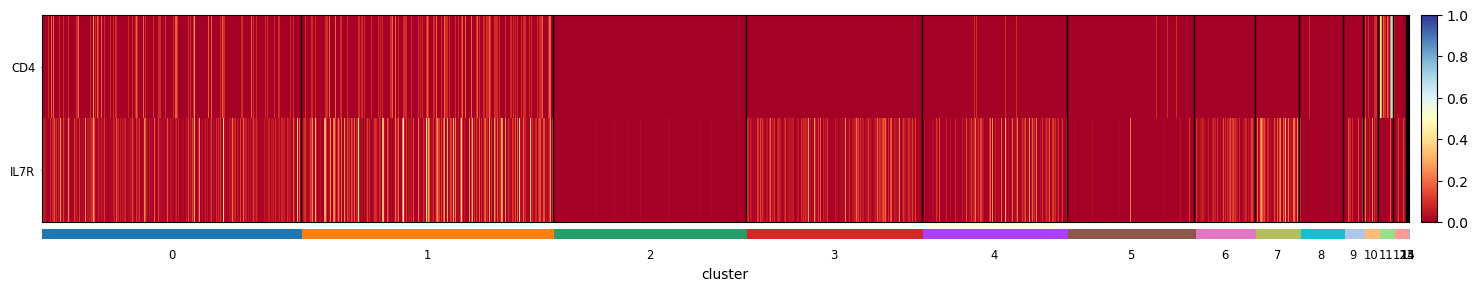

Genes selected from celltypist for Treg Cell


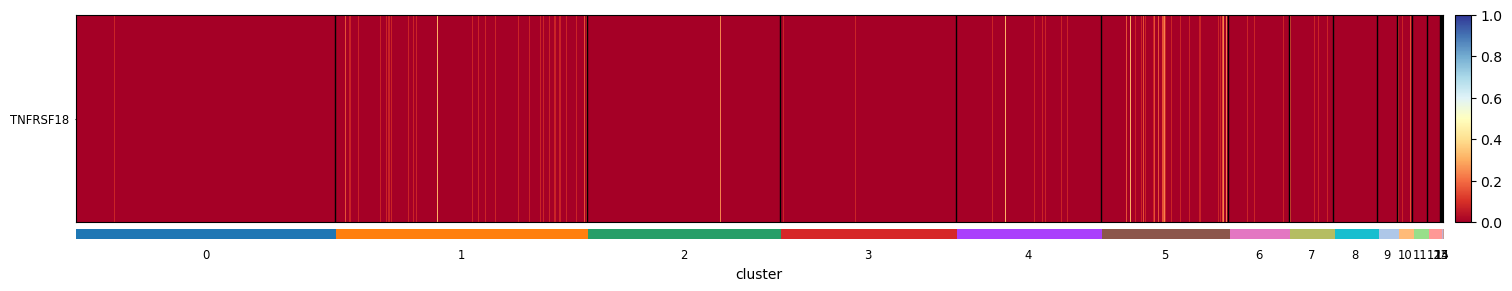

Genes selected from celltypist for CD8 T Cell


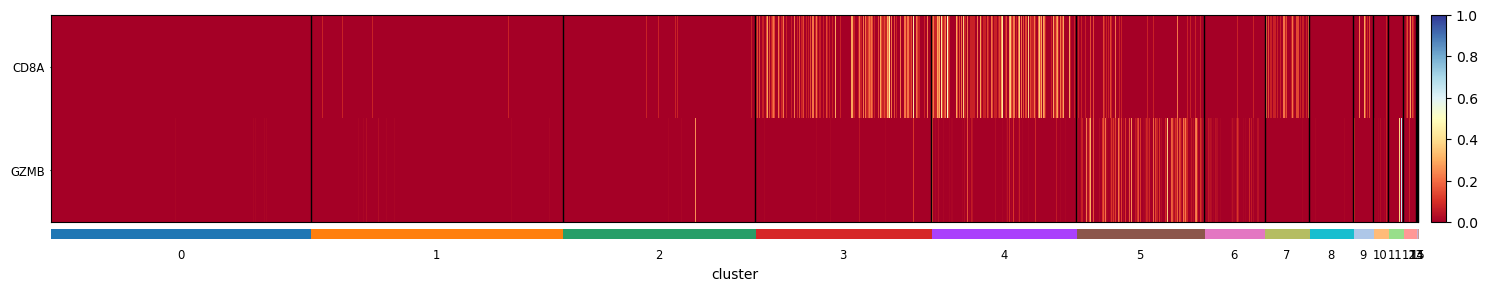

Genes selected from celltypist for NK Cell


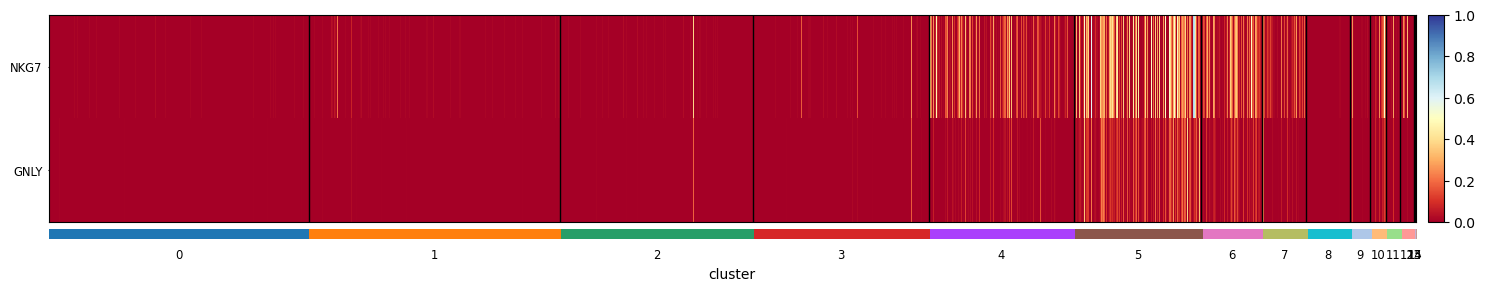

Genes selected from celltypist for Naive T Cell


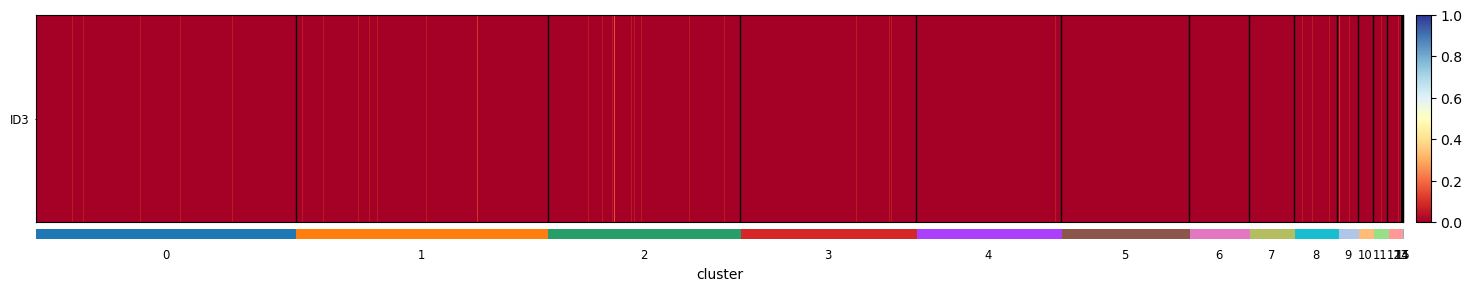

Genes selected from celltypist for B Cell


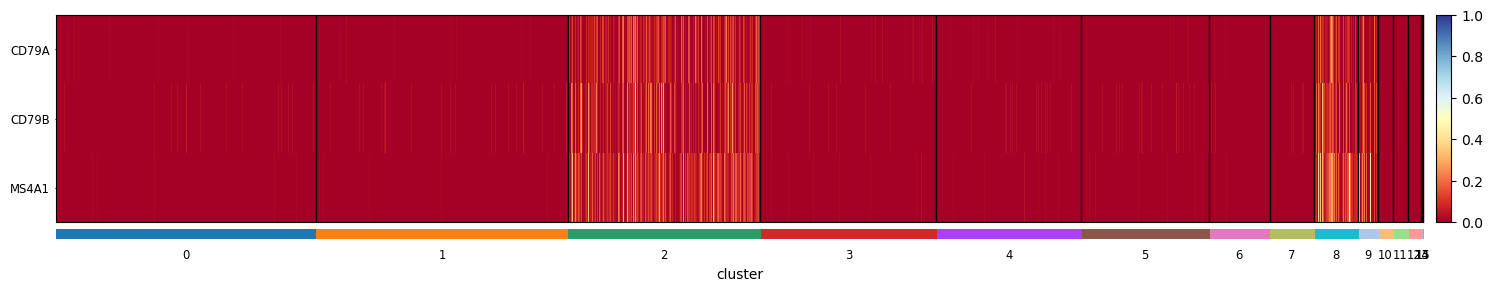

Genes selected from celltypist for Myeloid Cell


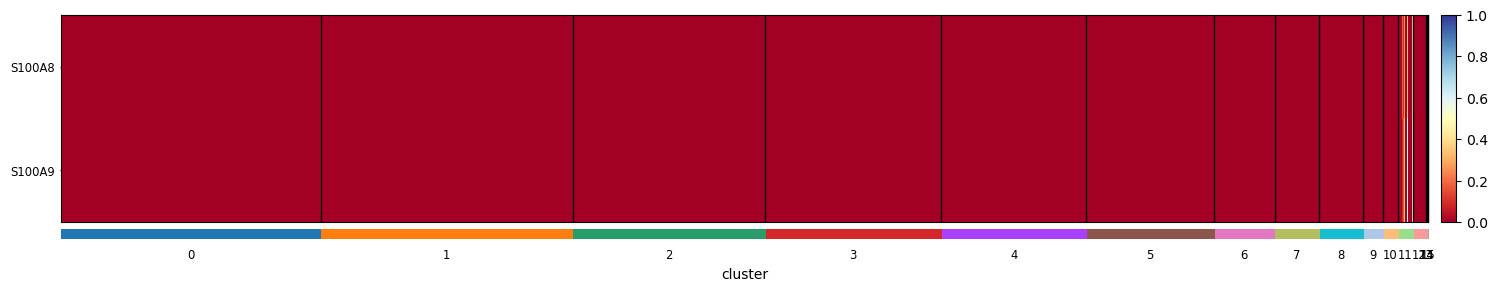

Genes selected from celltypist for CD14+ Monocyte


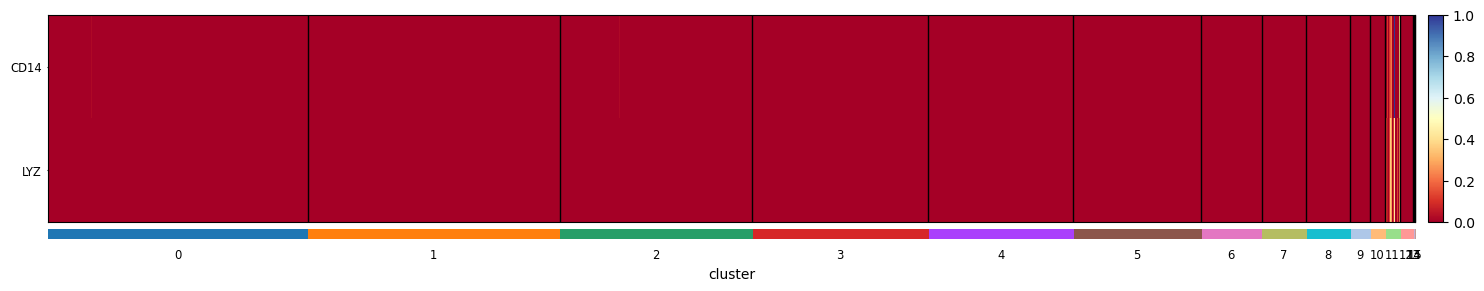

Genes selected from celltypist for CD16+ Monocyte


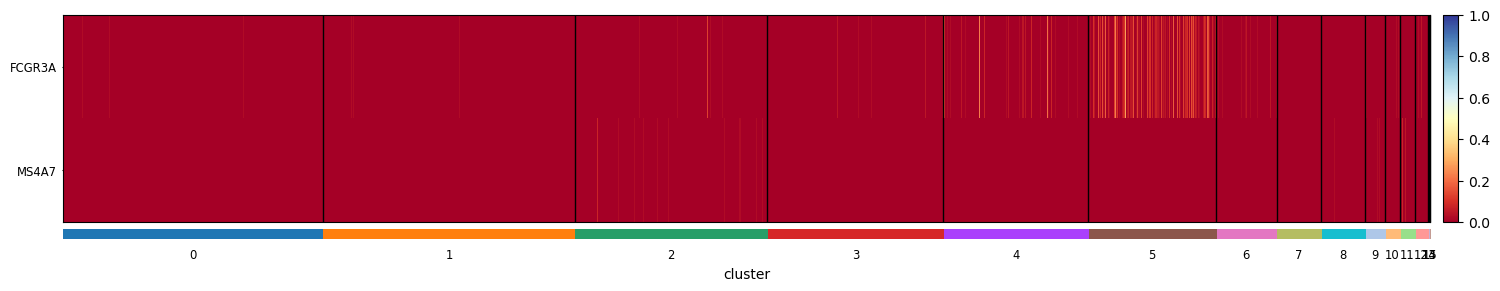

Genes selected from celltypist for Dendritic Cell


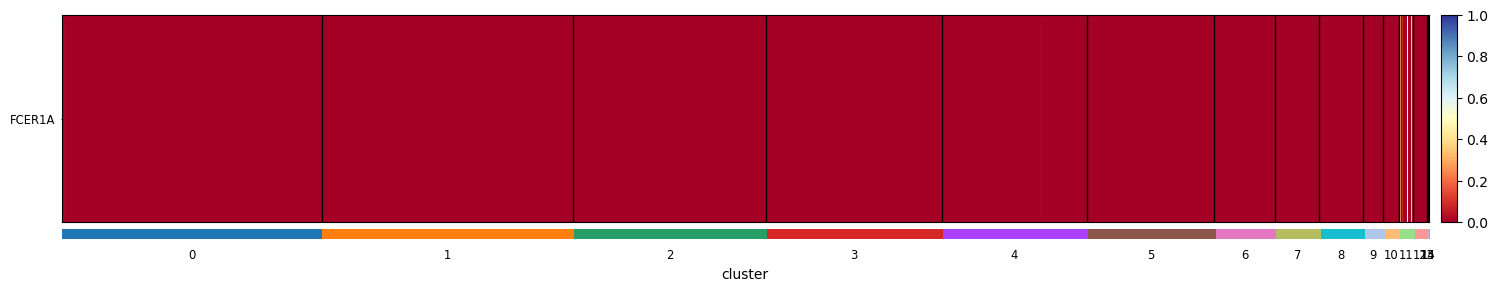

Genes selected from celltypist for Megakaryocites


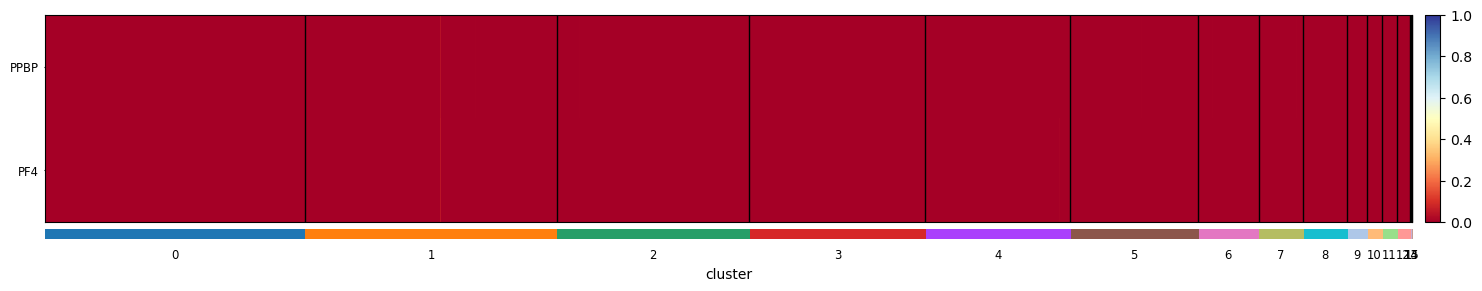

Genes selected from celltypist for Proliferating Erythrocytes


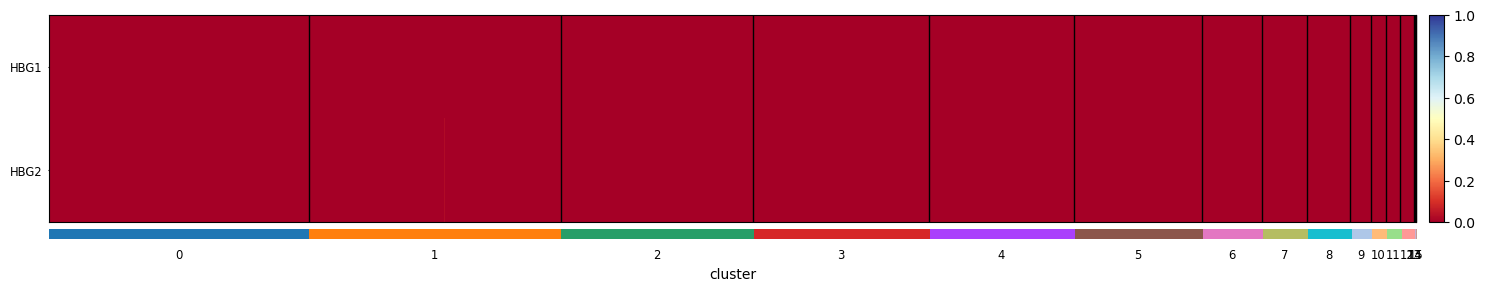

In [11]:
visualize_markes_heatmap(adata, markers_genes_dict_1)

| CELL TYPE                  | 0  | 1  | 2  | 3  | 4  | 5  | 6  | 7  | 8  | 9  | 10 | 11 | 12 | 13 | 14 | 15 |
|----------------------------|----|----|----|----|----|----|----|----|----|----|----|----|----|----|----|----|
| 'T Cell'                   | ✔️ | ✔️ |    | ✔️ | ✔️ |    |    | ✔️ |    |    |    |    |    |    |    |    |
| 'CD4 T Cell'               | ✔️ | ✔️ |    |    |    |    |    |    |    |    |    |    |    |    |    |    |
| 'Treg Cell'                |    |    |    |    |    |    |    |    |    |    |    |    |    |    |    |    |
| 'CD8 T Cell'               |    |    |    |    |    |    |    |    |    |    |    |    |    |    |    |    |
| 'NK Cell'                  |    |    |    |    |    | ✔️ |    |    |    |    |    |    |    |    |    |    |
| 'Naive T Cell'             |    |    |    |    |    |    |    |    |    |    |    |    |    |    |    |    |
| 'B Cell'                   |    |    | ✔️ |    |    |    |    |    | ✔️ | ✔️ |    |    |    |    |    |    |
| 'Myeloid Cell'             |    |    |    |    |    |    |    |    |    |    |    | ✔️ |    |    |    |    |
| 'CD14+ Monocyte'           |    |    |    |    |    |    |    |    |    |    |    | ✔️ |    |    |    |    |
| 'CD16+ Monocyte'           |    |    |    |    |    |    |    |    |    |    |    |    |    |    |    |    |
| 'Dendritic Cell'           |    |    |    |    |    |    |    |    |    |    |    | ✔️ |    |    |    |    |
| 'Megakaryocites'           |    |    |    |    |    |    |    |    |    |    |    |    |    |    |    |    |
| 'Proliferating Erythrocytes' |    |    |    |    |    |    |    |    |    |    |    |    |    |    |    |    |


#### Second set

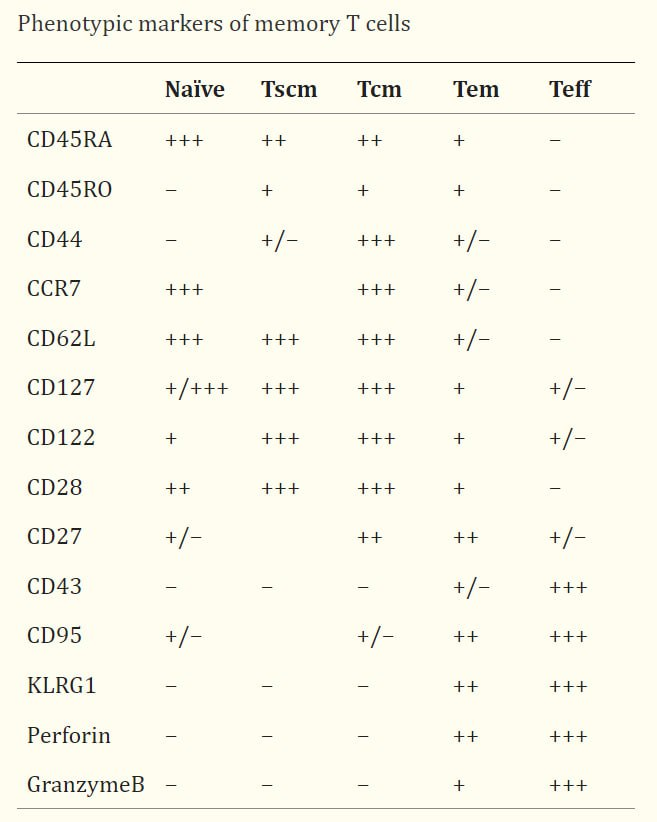

In [12]:
Image(filename='materials/photo1714122497.jpeg', width=250, height=250)

In [13]:
genes_list = ['CD45RA', 'CD45RO', 'CD44', 'CCR7', 'CD62L', 
    'CD122', 'CD28', 'CD27', 'CD43', 'CD95', 'KLRG1', 'Perforin', 'GrazymenB']

In [14]:
for gene in genes_list:
    if gene not in adata.var_names:
        print(gene)

CD45RA
CD45RO
CD62L
CD122
CD43
CD95
Perforin
GrazymenB


In [15]:
'CD45' in adata.var_names

False

In [16]:
'PTPRC' in adata.var_names # CD45 (CD45RA and CD45RO)

True

In [17]:
'CD62' in adata.var_names

False

In [18]:
'SELL' in adata.var_names # CD62L

True

In [19]:
'IL2RB' in adata.var_names # CD122

True

In [20]:
'SPN' in adata.var_names # CD43

True

In [21]:
'FAS' in adata.var_names # CD95

True

In [22]:
'PRF1' in adata.var_names # Perforin

True

In [23]:
'GZMB' in adata.var_names # GrazymenB

True

In [24]:
markers_genes_dict_2 = {
    'Naive, Tscm, Tcm, Tem or Teff': ['PTPRC', 'CD44', 'CCR7', 'SELL', 
    'IL2RB', 'CD28', 'CD27', 'SPN', 'FAS', 'KLRG1', 'PRF1', 'GZMB']
}

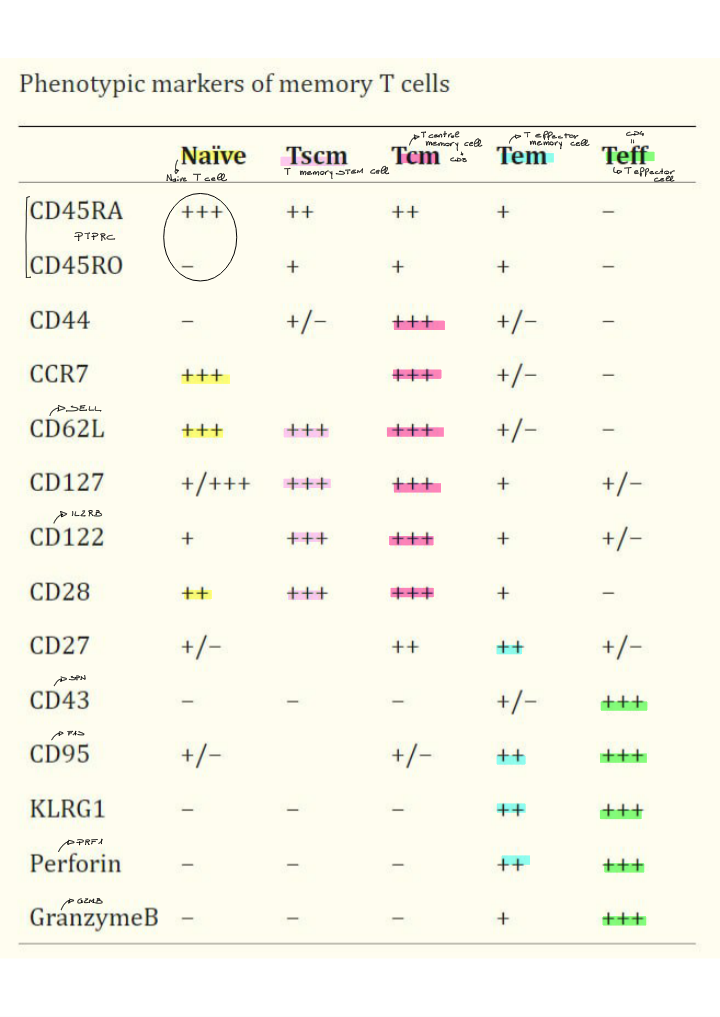

In [25]:
Image(filename=MARKERS2_CORRECTED_PATH, width=250, height=250)

Cluster 0
Genes selected from celltypist for Naive, Tscm, Tcm, Tem or Teff


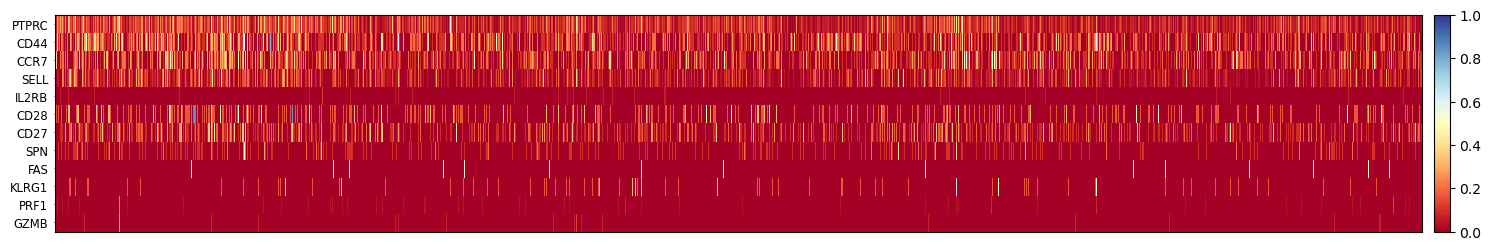

Cluster 1
Genes selected from celltypist for Naive, Tscm, Tcm, Tem or Teff


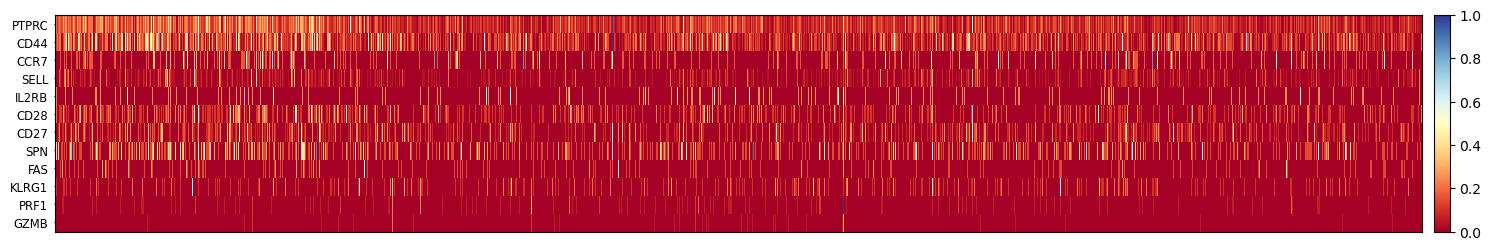

Cluster 2
Genes selected from celltypist for Naive, Tscm, Tcm, Tem or Teff


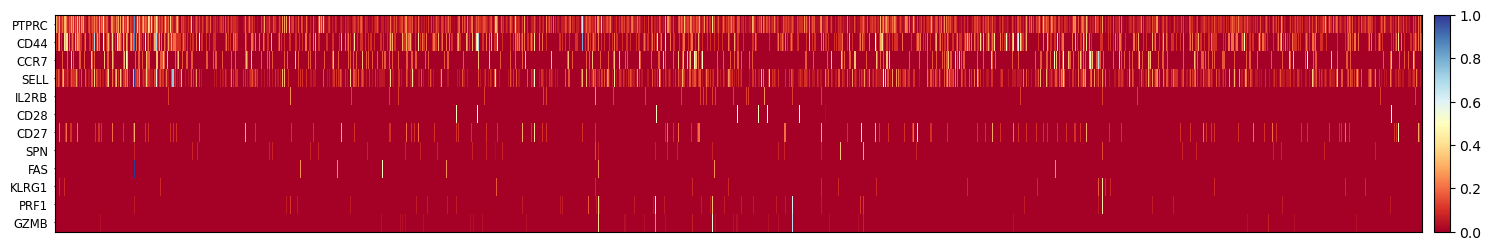

Cluster 3
Genes selected from celltypist for Naive, Tscm, Tcm, Tem or Teff


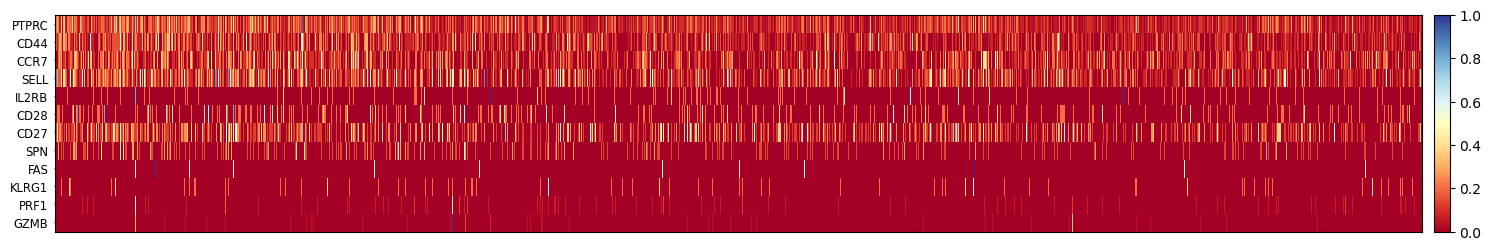

Cluster 4
Genes selected from celltypist for Naive, Tscm, Tcm, Tem or Teff


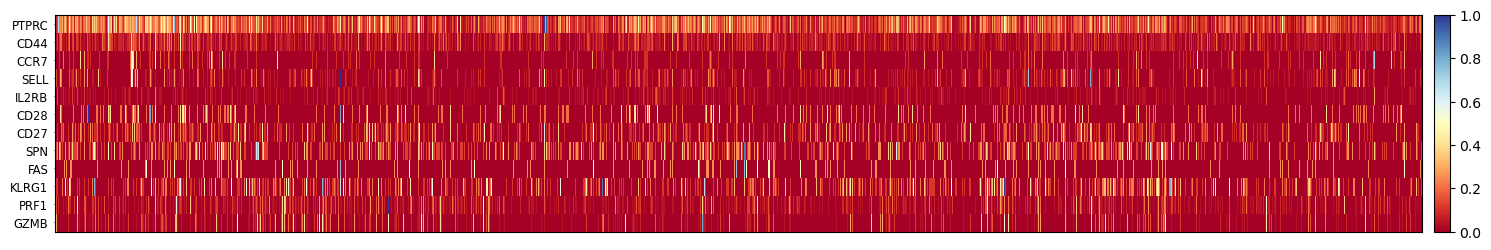

Cluster 5
Genes selected from celltypist for Naive, Tscm, Tcm, Tem or Teff


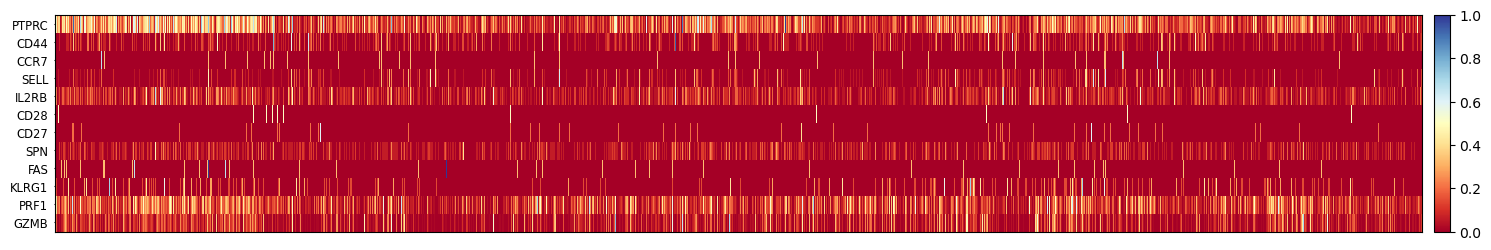

Cluster 6
Genes selected from celltypist for Naive, Tscm, Tcm, Tem or Teff


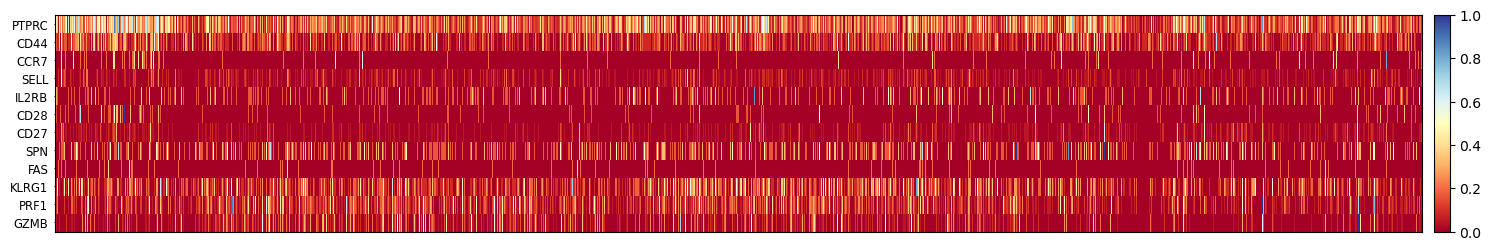

Cluster 7
Genes selected from celltypist for Naive, Tscm, Tcm, Tem or Teff


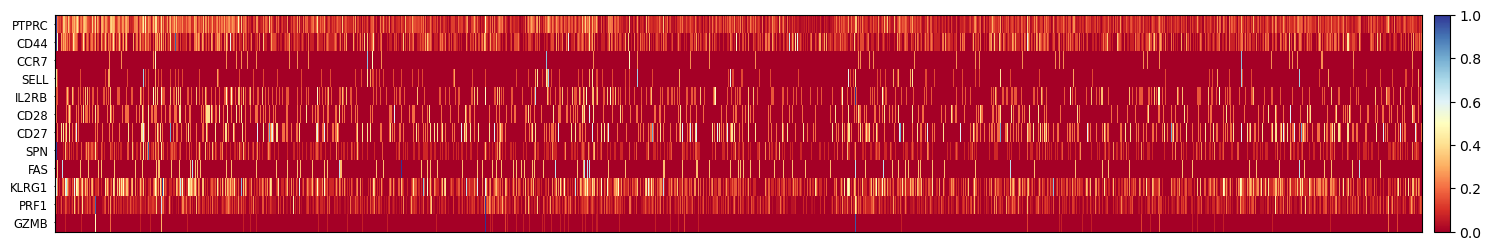

Cluster 8
Genes selected from celltypist for Naive, Tscm, Tcm, Tem or Teff


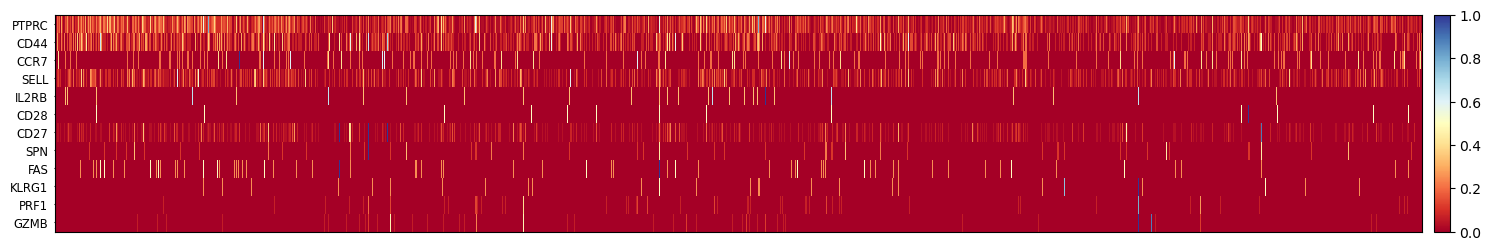

Cluster 9
Genes selected from celltypist for Naive, Tscm, Tcm, Tem or Teff


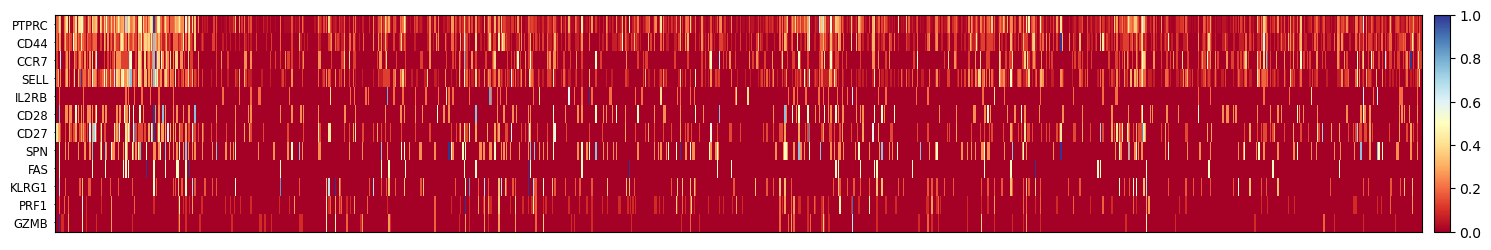

Cluster 10
Genes selected from celltypist for Naive, Tscm, Tcm, Tem or Teff


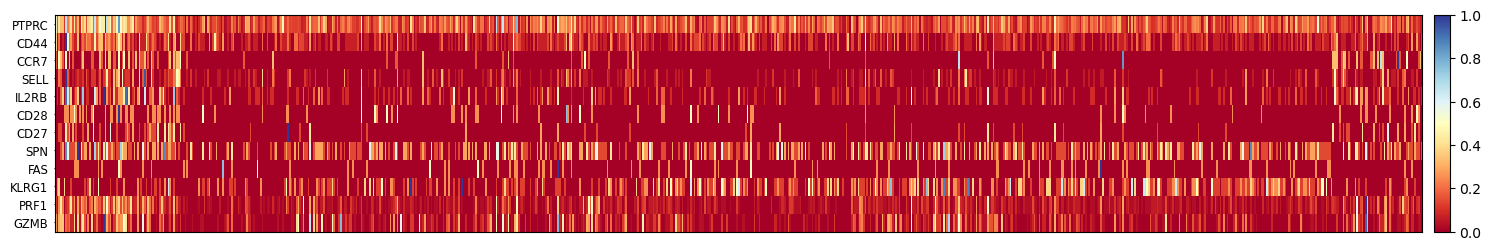

Cluster 11
Genes selected from celltypist for Naive, Tscm, Tcm, Tem or Teff


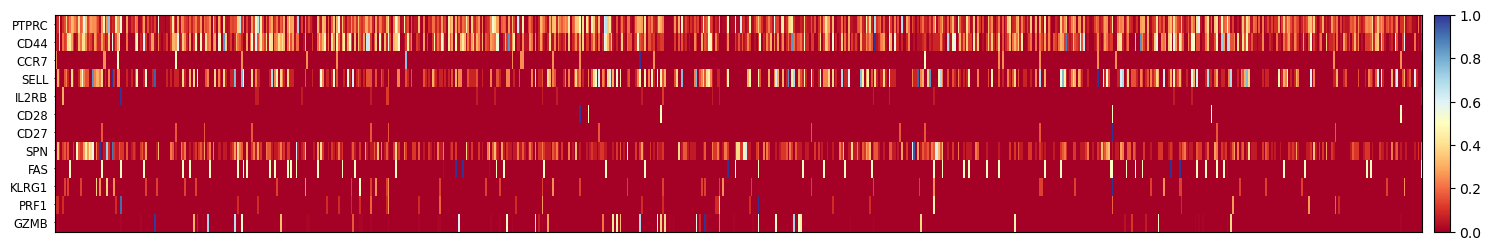

Cluster 12
Genes selected from celltypist for Naive, Tscm, Tcm, Tem or Teff


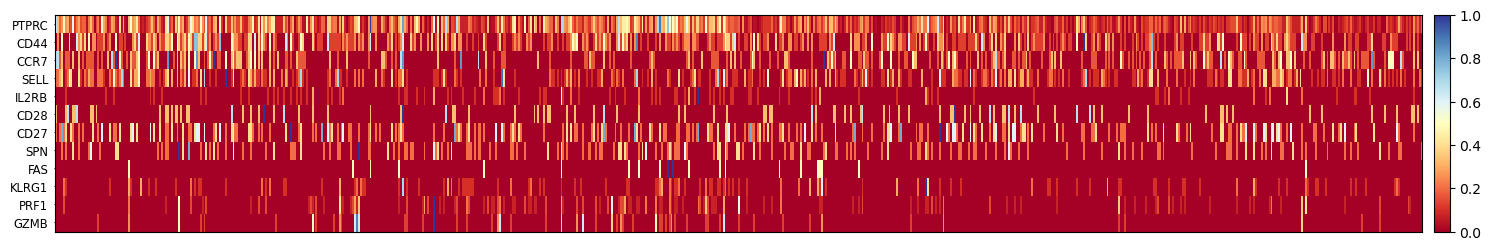

Cluster 13
Genes selected from celltypist for Naive, Tscm, Tcm, Tem or Teff


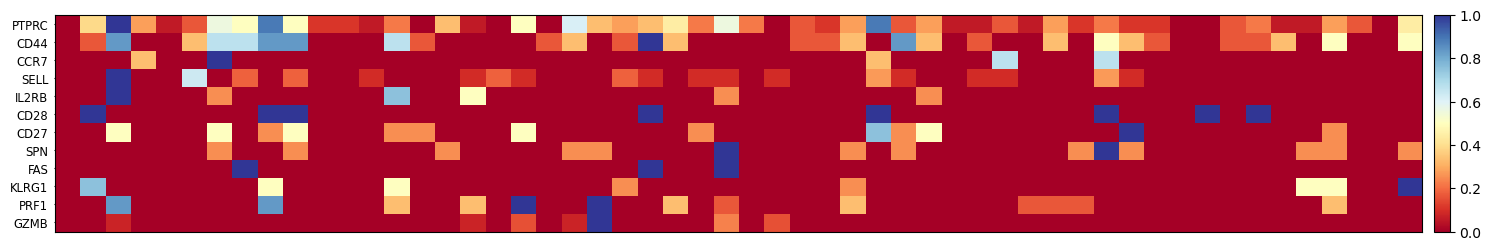

Cluster 14
Genes selected from celltypist for Naive, Tscm, Tcm, Tem or Teff


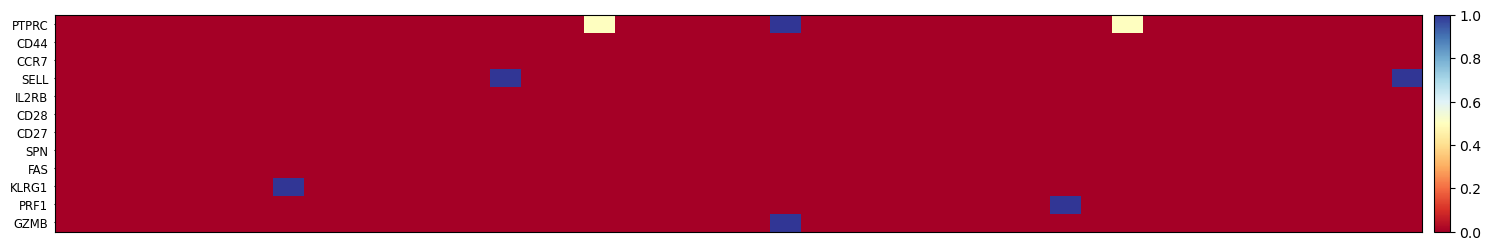

Cluster 15
Genes selected from celltypist for Naive, Tscm, Tcm, Tem or Teff


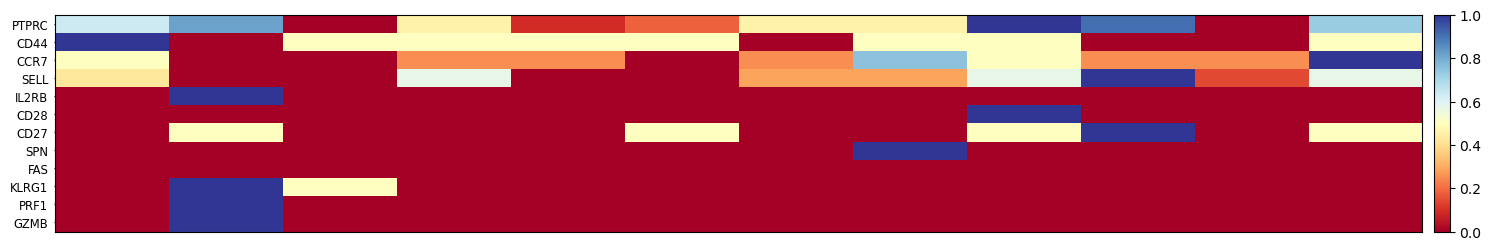

In [26]:
for cluster in range(16):
    print('Cluster', cluster)
    visualize_markes_heatmap(adata[adata.obs['cluster']==cluster], markers_genes_dict_2)

| CELL TYPE                  | 0  | 1  | 2  | 3  | 4  | 5  | 6  | 7  | 8  | 9  | 10 | 11 | 12 | 13 | 14 | 15 |
|----------------------------|----|----|----|----|----|----|----|----|----|----|----|----|----|----|----|----|
| 'Naive'                    |    |    |    |    |    |    |    |    |    | ✔️ |    |    |    |    |    |    |
| 'Tscm'                     |    |    |    |    |    |    |    |    |    |    |    |    |    |    |    |    |
| 'Tcm'                      | ✔️ | ✔️ |    | ✔️ | ✔️ | ✔️ | ✔️ | ✔️ |    |    |    |    |    | ✔️ | ✔️ |    |
| 'Tem'                      |    |    |    |    |    |    |    |    |    |    | ✔️ |    |    |    |    |    |
| 'Teff'                     |    |    |    |    |    |    |    |    |    |    |    | ✔️ |    |    |    |    |


## Results

In [27]:
cell_typist_clustering = {
    0: ['T Cell'], # 'T cells', 'HSC/MPP'
    1: ['T Cell'], # 'T cells', 'HSC/MPP'
    2: ['B Cell'],
    3: ['T Cell'],
    4: ['T Cell'],
    5: ['ILC'],
    6: [],
    7: [],
    8: ['B Cell'],
    9: ['B Cell'],
    10: [],
    11: ['Monocytes'], #'Monocytes', 'Macrophages', 'DC', 'pDC', 'Double-positive thymocytes', 'Mast cells'
    12: ['HSC/MPP'],
    13: ['HSC/MPP'],
    14: [],
    15: []
}

literature_clustering = {
    0: ['CD4 T Cell'], # T Cell', 'CD4 T Cell'
    1: ['CD4 T Cell'], # T Cell', 'CD4 T Cell'
    2: [],
    3: ['T Cell'],
    4: ['T Cell'],
    5: ['NK Cell'],
    6: [],
    7: ['T Cell'],
    8: ['B Cell'],
    9: ['B Cell'],
    10: [],
    11: ['Monocytes'], #'Myeloid Cell', 'CD14+ Monocyte', 'Dendritic Cell'
    12: [],
    13: [],
    14: [],
    15: []
}

literature_T_cells_clustering = {
    0: ['CD8 T Cell'], #Tcm
    1: ['CD8 T Cell'],
    2: [],
    3: ['CD8 T Cell'],
    4: ['CD8 T Cell'],
    5: ['CD8 T Cell'],
    6: ['CD8 T Cell'],
    7: ['CD8 T Cell'],
    8: [],
    9: ['Naive T Cell'], # Naive
    10: ['CD4 T Cell'], # Treg
    11: [],
    12: ['CD8 T Cell'],
    13: ['CD8 T Cell'],
    14: [],
    15: []
}

In [28]:
# create dataframe
cell_type_df = pd.DataFrame({
    'CellTypist': ['None' if len(cell_type)==0 else cell_type[0] for cell_type in cell_typist_clustering.values()],
    'Literature': ['None' if len(cell_type)==0 else cell_type[0] for cell_type in literature_clustering.values()],
    'Litterature (T Cells subtypes)': ['None' if len(cell_type)==0 else cell_type[0] for cell_type in literature_T_cells_clustering.values()],
})
cell_type_df.index = list(cell_typist_clustering.keys())
cell_type_df.head()

,CellTypist,Literature,Litterature (T Cells subtypes)
0,T Cell,CD4 T Cell,CD8 T Cell
1,T Cell,CD4 T Cell,CD8 T Cell
2,B Cell,None,None
3,T Cell,T Cell,CD8 T Cell
4,T Cell,T Cell,CD8 T Cell


In [29]:
cell_type_df.to_csv(RESULTS_FOLDER+'celltypes_labels_from_antibody_clusters.csv')

In [31]:
sankey_plot_with_labels(labels=[cell_type_df['CellTypist'], cell_type_df['Literature'], cell_type_df['Litterature (T Cells subtypes)']],
    labels_titles=['CellTypist', 'Literature', 'Litterature (T Cells subtypes)'], title='Cell Type from Clustering')